In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('dataset-of-90s.csv')

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


# checking basic integrity

In [4]:
data.shape

(5520, 19)

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 19 columns):
track               5520 non-null object
artist              5520 non-null object
uri                 5520 non-null object
danceability        5520 non-null float64
energy              5520 non-null float64
key                 5520 non-null int64
loudness            5520 non-null float64
mode                5520 non-null int64
speechiness         5520 non-null float64
acousticness        5520 non-null float64
instrumentalness    5520 non-null float64
liveness            5520 non-null float64
valence             5520 non-null float64
tempo               5520 non-null float64
duration_ms         5520 non-null int64
time_signature      5520 non-null int64
chorus_hit          5520 non-null float64
sections            5520 non-null int64
target              5520 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 819.5+ KB


# no. of rows = non null values for each column -> no null value

In [6]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


# checking unique records using uri

In [7]:
# extracting exact id
def extract(x):
    splited_list = x.split(':') # spliting text at colons
    return splited_list[2]      # returning third element
    
data['uri'] = data['uri'].apply(extract)  

In [8]:
data.head() #successfully extracted the id

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


# checking for duplicate rows

In [9]:
data['uri'].nunique(), 

(5506,)

In [10]:
data['uri'].value_counts()


7bp5DfkdK1OAvNJ1U4HfDA    2
6wetvpPWooBdmAEOKnDhpo    2
69uJi5QsBtqlYkGURTBli8    2
4RADreHMvMkZwsPgPr9z5c    2
6uImoDq9R3ZfJOPXkLdyWo    2
                         ..
42PgBU5zsMItWXs9Gd9MIP    1
0DWAnPgkLR2X4ys9OJCaZT    1
2QBVtTczFA5YLg8u1Gecwn    1
2ZK3pWvGZTlklRiDqNdnUf    1
2qx8wHW2Npc2wD1ONfR8Al    1
Name: uri, Length: 5506, dtype: int64

In [11]:
data['uri'].value_counts().unique() 

array([2, 1], dtype=int64)

In [12]:
dupe_mask = data['uri'].value_counts()==2

In [13]:
dupe_ids = dupe_mask[dupe_mask]

dupe_ids.value_counts,  dupe_ids.shape  

(<bound method IndexOpsMixin.value_counts of 7bp5DfkdK1OAvNJ1U4HfDA    True
 6wetvpPWooBdmAEOKnDhpo    True
 69uJi5QsBtqlYkGURTBli8    True
 4RADreHMvMkZwsPgPr9z5c    True
 6uImoDq9R3ZfJOPXkLdyWo    True
 2rVXKUyHxMoWk7vTyOcYIH    True
 5GorFaKkP2mLREQvhSblIg    True
 2drQ6wg2hdl6RDslarifh8    True
 3CO19cTl5zzlWx9GWEpOhD    True
 1blZP5x1XQSqQFpTy12rFh    True
 3xSu3S8v206qwhob9N2LGJ    True
 2FJiNQbxS33DkE0w5IXoxc    True
 7okbmgA8lRBGl5limZ7LFM    True
 5nHQ2YPVcddwJz71aupuvz    True
 Name: uri, dtype: bool>, (14,))

In [14]:
#converting duplicate ids into a list
dupe_ids  = dupe_ids.index
dupe_ids = dupe_ids.tolist()
dupe_ids

['7bp5DfkdK1OAvNJ1U4HfDA',
 '6wetvpPWooBdmAEOKnDhpo',
 '69uJi5QsBtqlYkGURTBli8',
 '4RADreHMvMkZwsPgPr9z5c',
 '6uImoDq9R3ZfJOPXkLdyWo',
 '2rVXKUyHxMoWk7vTyOcYIH',
 '5GorFaKkP2mLREQvhSblIg',
 '2drQ6wg2hdl6RDslarifh8',
 '3CO19cTl5zzlWx9GWEpOhD',
 '1blZP5x1XQSqQFpTy12rFh',
 '3xSu3S8v206qwhob9N2LGJ',
 '2FJiNQbxS33DkE0w5IXoxc',
 '7okbmgA8lRBGl5limZ7LFM',
 '5nHQ2YPVcddwJz71aupuvz']

In [15]:
duplicate_index = data.loc[data['uri'].isin(dupe_ids),:].index  # all the duplicted records
duplicate_index = duplicate_index.tolist()

# We will be removing all the duplication as they are few compared to data

In [16]:
data.drop(duplicate_index,axis=0,inplace=True)
data.shape

(5492, 19)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5492 entries, 0 to 5519
Data columns (total 19 columns):
track               5492 non-null object
artist              5492 non-null object
uri                 5492 non-null object
danceability        5492 non-null float64
energy              5492 non-null float64
key                 5492 non-null int64
loudness            5492 non-null float64
mode                5492 non-null int64
speechiness         5492 non-null float64
acousticness        5492 non-null float64
instrumentalness    5492 non-null float64
liveness            5492 non-null float64
valence             5492 non-null float64
tempo               5492 non-null float64
duration_ms         5492 non-null int64
time_signature      5492 non-null int64
chorus_hit          5492 non-null float64
sections            5492 non-null int64
target              5492 non-null int64
dtypes: float64(10), int64(6), object(3)
memory usage: 858.1+ KB


In [18]:
print("shape of data",data.shape )
print("no. of unique rows",data['uri'].nunique()) # no duplicates

shape of data (5492, 19)
no. of unique rows 5492


In [19]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Misty Roses,Astrud Gilberto,50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,Never Ever,All Saints,5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,Soul Sermon,Gregg Karukas,6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,Clarinet Marmalade - Live,Alton Purnell,5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


# now we will be dropping all the unnecessary columns which contain string which cant be eficiently converted into numerics

In [20]:
data.drop(['track','artist','uri'],axis=1,inplace=True)

In [21]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


# Univariate analysis

<AxesSubplot:xlabel='target', ylabel='count'>

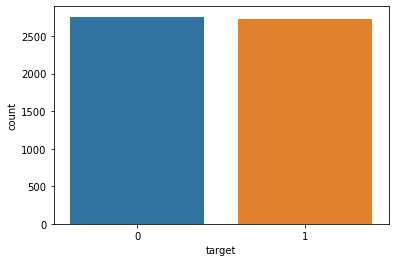

In [22]:
#analysing class imbalance
sns.countplot(data=data,x='target') 

In [23]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections', 'target'],
      dtype='object')

In [24]:
# checking appropriate data type
data[['danceability', 'energy', 'key', 'loudness']].info() # every feature have appropriate datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5492 entries, 0 to 5519
Data columns (total 4 columns):
danceability    5492 non-null float64
energy          5492 non-null float64
key             5492 non-null int64
loudness        5492 non-null float64
dtypes: float64(3), int64(1)
memory usage: 374.5 KB


In [25]:
# checking range of first 4 features 
data[['danceability', 'energy', 'key', 'loudness']].describe()


,danceability,energy,key,loudness
count,5492.000000,5492.000000,5492.000000,5492.000000
mean,0.566436,0.602626,5.267662,-10.237243
std,0.180547,0.252412,3.513445,5.124837
min,0.057600,0.000357,0.000000,-49.253000
25%,0.450000,0.435000,2.000000,-12.210000
50%,0.586000,0.635000,5.000000,-9.073500
75%,0.698000,0.812000,8.000000,-6.884000
max,0.979000,0.998000,11.000000,-1.169000


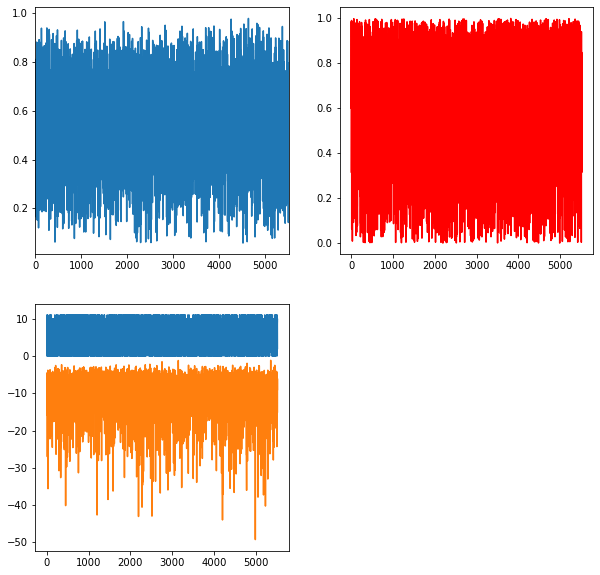

In [26]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
data['danceability'].plot()
plt.subplot(2,2,2)
plt.plot(data['energy'],color='red')
plt.subplot(2,2,3)
plt.plot(data[['key','loudness']])


#  danceabilty is well inside the range(0,1)
# energy is well inside the range(0,1)
# there's no -1 for keys-> every track has been assigned respective keys
# loudness values are out of range(0,-60)db

In [27]:
loudness_error_idnex = data[data['loudness']>0].index
loudness_error_idnex

Int64Index([], dtype='int64')

In [28]:
 # removing rows with out of range values in loudness column
data.drop(loudness_error_idnex,axis=0, inplace=True)

In [29]:
data.shape  # record is removed 

(5492, 16)

In [30]:
# checking appropriate datatype for next 5 columns
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].info() # datatypes are in acoordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5492 entries, 0 to 5519
Data columns (total 5 columns):
mode                5492 non-null int64
speechiness         5492 non-null float64
acousticness        5492 non-null float64
instrumentalness    5492 non-null float64
liveness            5492 non-null float64
dtypes: float64(4), int64(1)
memory usage: 257.4 KB


In [31]:
data[['mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness',]].describe() # every feautre is within range

,mode,speechiness,acousticness,instrumentalness,liveness
count,5492.000000,5492.000000,5492.000000,5492.000000,5492.000000
mean,0.669701,0.074057,0.291424,0.160700,0.197395
std,0.470363,0.081923,0.325001,0.304968,0.174913
min,0.000000,0.022000,0.000000,0.000000,0.013000
25%,0.000000,0.033200,0.018000,0.000000,0.089500
50%,1.000000,0.043300,0.139000,0.000244,0.127000
75%,1.000000,0.073000,0.530000,0.094250,0.260000
max,1.000000,0.950000,0.996000,0.997000,0.992000


<AxesSubplot:xlabel='mode', ylabel='count'>

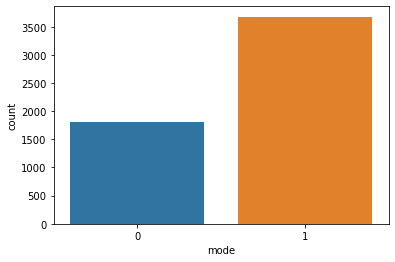

In [32]:
sns.countplot(x=data['mode']) # have only two possible values 0 and 1, no noise in the feature

In [33]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].info() # data type is in accordance with provided info

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5492 entries, 0 to 5519
Data columns (total 6 columns):
valence           5492 non-null float64
tempo             5492 non-null float64
duration_ms       5492 non-null int64
time_signature    5492 non-null int64
chorus_hit        5492 non-null float64
sections          5492 non-null int64
dtypes: float64(3), int64(3)
memory usage: 460.3 KB


In [34]:
data[['valence', 'tempo',
       'duration_ms', 'time_signature', 'chorus_hit', 'sections']].describe() # all the data are in specified range

,valence,tempo,duration_ms,time_signature,chorus_hit,sections
count,5492.000000,5492.000000,5.492000e+03,5492.000000,5492.000000,5492.000000
mean,0.537960,118.805382,2.562105e+05,3.921704,40.991701,11.127822
std,0.257767,29.513956,1.036665e+05,0.353027,19.944363,4.493916
min,0.000000,34.535000,1.953300e+04,1.000000,0.000000,1.000000
25%,0.330000,96.427500,2.024368e+05,4.000000,28.074175,9.000000
50%,0.556000,114.907500,2.467200e+05,4.000000,36.512680,11.000000
75%,0.751000,135.967500,2.899628e+05,4.000000,48.600567,13.000000
max,0.996000,217.943000,1.711800e+06,5.000000,235.060740,69.000000


# Performing F-test to know the relation between every feature and target

In [35]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0
1,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1
2,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0
3,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0
4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0


In [36]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
x.shape,y.shape

((5492, 15), (5492,))

In [37]:
from sklearn.feature_selection import f_classif
f_stat,p_value = f_classif(x,y) 

In [38]:
feat_list = data.iloc[:,:-1].columns.tolist()

In [39]:
# making a dataframe
dict = {'Features':feat_list,'f_statistics':f_stat,'p_value':p_value}
relation = pd.DataFrame(dict)
relation.sort_values(by='p_value')

,Features,f_statistics,p_value
0,danceability,1425.675283,1.428446e-277
7,instrumentalness,1220.196686,1.379607e-241
6,acousticness,904.757621,3.937902e-184
3,loudness,695.899252,1.703035e-144
1,energy,284.545338,2.779980e-62
9,valence,169.143130,4.143110e-38
12,time_signature,70.389875,6.125760e-17
8,liveness,57.305762,4.350247e-14
11,duration_ms,29.260505,6.595148e-08
2,key,16.634325,4.596492e-05


# Multivariate analysis

In [40]:
correlation = data.corr()

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

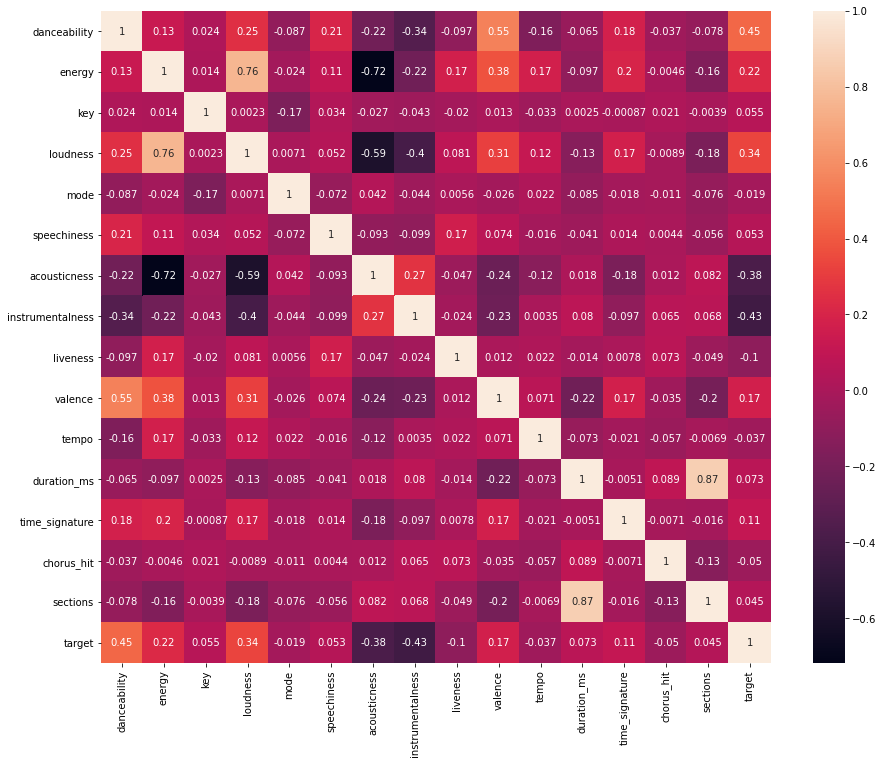

In [41]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, annot=True)
plt.tight_layout

# strong features(accordance with f-test) --> 
danceability,  loudness,  acousticness,  instrumentalness,  valence

# less imortant feature(accordance with f-test)-->
duration,  section,  mode,  time_signature,  chorus hit

# least imortant-->  
energy,key,speecheness,liveliness,tempo